In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
import torchvision, cv2
from utils.visualizations import plot_samples
from utils.transforms import *
from utils.dataset import AmbientaDataset, PhysionetDataset, classes

In [36]:
physionet = PhysionetDataset(train=True)
cifar = torchvision.datasets.CIFAR10(root='./data', train=True, download=True)

Reading Files: [--------------------------------] 136/136, Total Samples: 12756


Files already downloaded and verified


In [70]:
from utils.transforms import *
import utils.transforms as tf
import importlib
importlib.reload(tf)

zca_cifar = zca(cifar.data, epsilon=0.1)
zca_physionet = zca(physionet.x, epsilon=0.1)

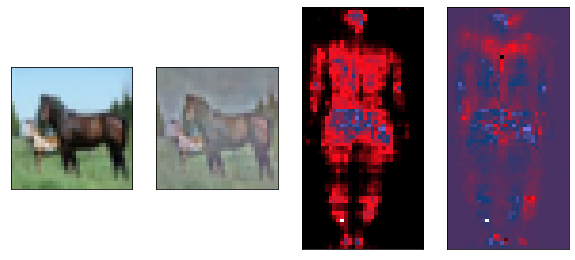

In [74]:
from utils.visualizations import *
import utils.visualizations as vi
import importlib
importlib.reload(vi)

image_row(cifar.data[12], zca_cifar[12], physionet.x[0], zca_physionet[0])

In [22]:
indices_per_class = {}
for i, label in enumerate(classes):
    indices = np.where(dataset.y == i)[0]
    indices_per_class[i] = indices
# print(indices_per_class)

In [23]:
sample_indices = [index for index in list(map(lambda c: random.choice(c) if len(c) > 0 else None, indices_per_class.values()))]
print(sample_indices)

[3323, 10935, 5331, 6606, 6718, 4969, 5523, 4240, None, None, None]


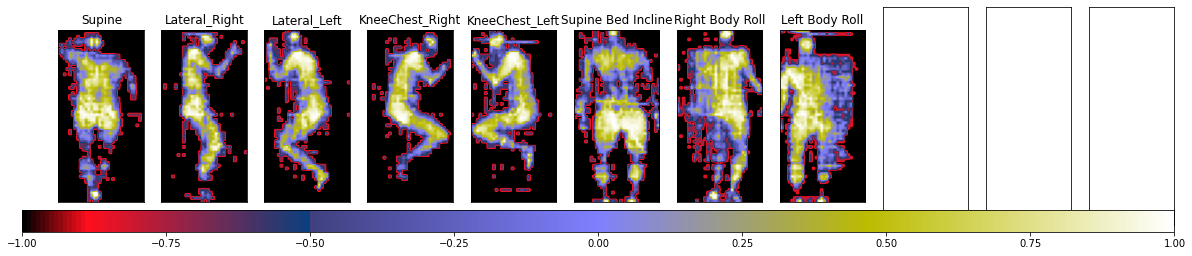

In [29]:
plot_samples(dataset, sample_indices, classes, torchvision.transforms.Compose([
        Normalize(),
        EqualizeHist(),
]))

11


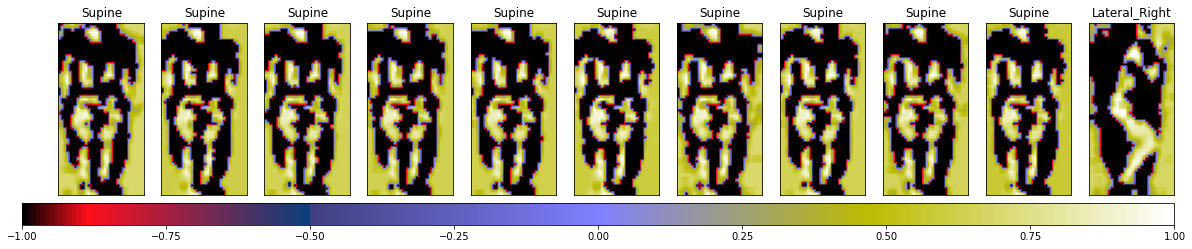

In [35]:
from utils.transforms import *
from utils.visualizations import *
import utils.transforms as tf
import utils.visualizations as vi
import importlib
importlib.reload(tf)
importlib.reload(vi)

basic_transforms = [
    Normalize(),
    EqualizeHist(),
    Blur((3, 3)),
    Threshold(lambda img: np.median(img[img > 0.0])),
]

physionet.x = zca_physionet
plot_samples(physionet, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 101], classes, transform = torchvision.transforms.Compose([
    *basic_transforms,
]))

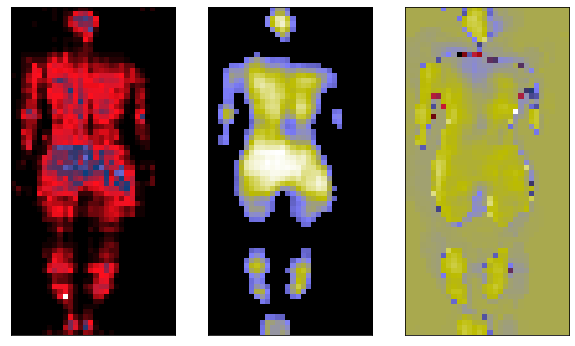

In [75]:
from utils.transforms import *
from utils.visualizations import *
import utils.transforms as tf
import utils.visualizations as vi
import importlib
importlib.reload(tf)
importlib.reload(vi)

transforms = torchvision.transforms.Compose([
    Normalize(),
    EqualizeHist(),
    Blur((3, 3)),
    Threshold(lambda img: np.median(img[img > 0.0])),
])

physionet_transformed = np.array(list(map(lambda i: i[0], [transforms(sample) for sample in physionet])))
zca_transformed_physionet = zca(physionet_transformed, epsilon=0.1)

image_row(physionet.x[0], physionet_transformed[0], zca_transformed_physionet[0])

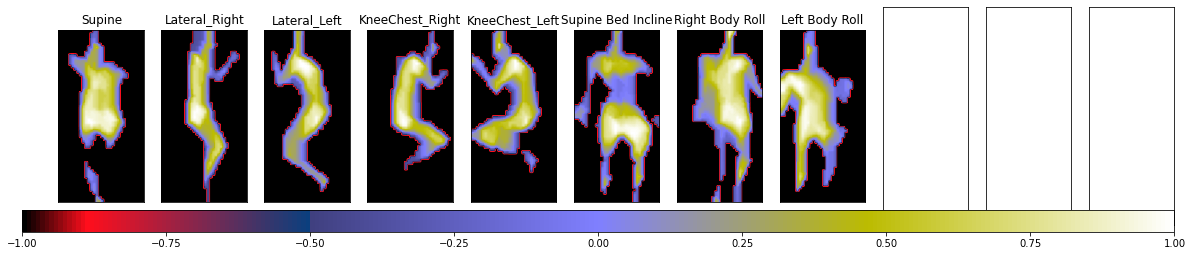

In [28]:
plot_samples(dataset, sample_indices, classes, transform = torchvision.transforms.Compose([
        *basic_transforms,
        Close((2,4), ktype=cv2.MORPH_CROSS, iterations=2),
        # Erode((2,2), ktype=cv2.MORPH_CROSS, iterations=2),
        #Close((3,3), ktype=cv2.MORPH_CROSS, iterations=2),
]))